# Predicting the Salaries of NBA Players
Nish Gowda

## Data Processing

In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

Basketball reference is a great website that has all the data we need for this. Using beautiful soup and pandas, we can scrape all the data from site and create a dataframe with it. The stats we'll looka t in particular are the standard box score stats like points, rebounds, assists, etc. but also "advanced" stats like true shooting percentage and usage percentage.

In [29]:
def scrape_nba_player_stats(year):
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'
    table = pd.read_html(url)
    df = table[0]
    #abl = df.filter(['Player','G', 'WS', 'BPM', 'VORP'])
    df = df[['Player','G', 'WS', 'BPM', 'VORP', 'TS%', 'PER']]
    df = df[df.Player != 'Player']
    df = df[df.G != 'G']
    df = df[df.WS != 'WS']
    df = df[df.BPM != 'BPM']
    df = df[df.VORP != 'VORP']
    df = df[df.PER != 'PER']
    df = df[df['TS%'] != 'TS%']

    cols = df.select_dtypes(include=[np.object]).columns
    df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
    df
    df['G'] = df['G'].astype(float)
    df['WS'] = df['WS'].astype(float)
    df['BPM'] = df['BPM'].astype(float)
    df['VORP'] = df['VORP'].astype(float)
    df['TS%'] = df['TS%'].astype(float)
    df['PER'] = df['PER'].astype(float)

    return df

In [30]:
def get_salary_cap(year):
    page = """
    <div class="sr_share_wrap" style="overflow:auto">
<table class="sr_share" id="" data-cols-to-freeze=",1"><thead></thead>
    <caption>Salary Cap History Table</caption>
      <tbody>
      <tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1985.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1984-85</a></th><td>$3,600,000</td><td>$9,083,539</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1986.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1985-86</a></th><td>$4,233,000</td><td>$10,479,694</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1987.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1986-87</a></th><td>$4,945,000</td><td>$11,812,089</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1988.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1987-88</a></th><td>$6,164,000</td><td>$14,143,899</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1989.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1988-89</a></th><td>$7,232,000</td><td>$15,832,740</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1990.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1989-90</a></th><td>$9,802,000</td><td>$20,360,496</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1991.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1990-91</a></th><td>$11,871,000</td><td>$23,652,090</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1992.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1991-92</a></th><td>$12,500,000</td><td>$24,172,990</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1993.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1992-93</a></th><td>$14,000,000</td><td>$26,300,391</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1994.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1993-94</a></th><td>$15,175,000</td><td>$27,784,491</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1995.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1994-95</a></th><td>$15,964,000</td><td>$28,431,190</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1996.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1995-96</a></th><td>$23,000,000</td><td>$39,797,368</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1997.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1996-97</a></th><td>$24,363,000</td><td>$41,185,792</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1998.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1997-98</a></th><td>$26,900,000</td><td>$44,787,566</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_1999.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1998-99</a></th><td>$30,000,000</td><td>$48,871,354</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2000.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">1999-00</a></th><td>$34,000,000</td><td>$53,578,743</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2001.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2000-01</a></th><td>$35,500,000</td><td>$54,407,536</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2002.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2001-02</a></th><td>$42,500,000</td><td>$64,123,496</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2003.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2002-03</a></th><td>$40,271,000</td><td>$59,408,466</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2004.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2003-04</a></th><td>$43,840,000</td><td>$62,987,174</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2005.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2004-05</a></th><td>$43,870,000</td><td>$60,957,548</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2006.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2005-06</a></th><td>$49,500,000</td><td>$66,634,615</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2007.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2006-07</a></th><td>$53,135,000</td><td>$69,541,955</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2008.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2007-08</a></th><td>$55,630,000</td><td>$70,117,874</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2009.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2008-09</a></th><td>$58,680,000</td><td>$74,226,058</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2010.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2009-10</a></th><td>$57,700,000</td><td>$71,805,814</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2011.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2010-11</a></th><td>$58,044,000</td><td>$70,022,014</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2012.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2011-12</a></th><td>$58,044,000</td><td>$68,611,221</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2013.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2012-13</a></th><td>$58,044,000</td><td>$67,621,260</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2014.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2013-14</a></th><td>$58,679,000</td><td>$67,265,567</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2015.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2014-15</a></th><td>$63,065,000</td><td>$72,202,032</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2016.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2015-16</a></th><td>$70,000,000</td><td>$79,141,827</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2017.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2016-17</a></th><td>$94,143,000</td><td>$104,227,011</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2018.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2017-18</a></th><td>$99,093,000</td><td>$107,090,301</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2019.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2018-19</a></th><td>$101,869,000</td><td>$108,127,254</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2020.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2019-20</a></th><td>$109,140,000</td><td>$114,444,734</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2021.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2020-21</a></th><td>$109,140,000</td><td>$109,140,000</td></tr>
<tr><th scope="row"><a href="https://www.basketball-reference.com/leagues/NBA_2022.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">2021-22</a></th><td>$112,414,000</td><td></td></tr>
</tbody></table><div id="credit_salary_cap_history" class="sr_share" style="font-size: 0.83em;">Provided by <a href="https://www.sports-reference.com/sharing.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">Basketball-Reference.com</a>: <a href="https://www.basketball-reference.com/contracts/salary-cap-history.html?sr&amp;utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool#salary_cap_history">View Original Table</a><br>Generated 12/10/2021.</div>

"""
    soup = BeautifulSoup(page, "html.parser")
    rows = soup.findAll('tr')
    rows_data = [[td.getText().strip().replace("$", "").replace(",", "") for td in rows[i].findAll('td')]
                        for i in range(len(rows))]
    year_to_grab = 2022 - year
    return float(rows_data[(len(rows_data) - 1) - year_to_grab][0])
                


In [31]:
def scrape_player_salaries(year):
    url = ''
    s = ''
    if year == 2022:
        url = 'https://hoopshype.com/salaries/players/'
        s = '2021/22'
    else:
        url = f'https://hoopshype.com/salaries/players/{year-1}-{year}/'
        s = f'{year-1}/{str(year)[2:]}'
    table = pd.read_html(url)
    df = table[0]
    #print(df)
    df = df[['Player', s]]
    #print(df[df["Player"] == "Nikola Jokic"])
    df = df.replace(r'^\s*$', 0, regex=True)
    df = df.rename(columns={s:"Salary"})
    #df['Salary'] = df['Salary'].str.strip().replace("$", "").replace(",", "")
    df['Salary'] = df['Salary'].str.replace(',', '').str.replace('$', '').astype(float)
    df = df.dropna()
    df = df.drop_duplicates()
    salary_cap = get_salary_cap(year)
    df['salary_per_cap'] = df['Salary'] / salary_cap 
    return df
        


However, it's important that we don't just look at the basic "box score" stats. Advanced stats can paint a broader picture about a player's value to their team so it's key that we grab that data as well.

In [32]:
years = [yr for yr in range(2015, 2023)]
dfs = []
for year in years:
    adv_df = scrape_nba_player_stats(year)
    salary_df = scrape_player_salaries(year)
    df = pd.merge(salary_df, adv_df, how="inner", on="Player")
    df['Year'] = str(year).strip()
    max_games = df["G"].max()
    df = df.drop(df[df['G'] < 0.3 * max_games].index)    
    dfs.append(df)

## Exploratory Data Analysis & Visualization

First, we need to start this process by looking at the stats we've scraped and deciding on the best approach to predict how much a player should earn

### How valuable is a player?

Now that we have all the data, we need to come up with a way to determine how valuable a player is to their team. 

Although we have stats like Points, Assists, Rebounds, and Steals, it's not fair to simply use these metrics as a means to determine how valuable a player is to their team winning. These "box score" stats don't necessarily paint the full picture for how import a player is to their teams success.

This is where we use the advanced stats provided by basketball reference. 

In [33]:
df_merged = pd.concat(dfs)

In [34]:
len(df_merged)

3329

In [35]:
df_merged.to_csv('2015-2022_stats.csv', index=False)

### Stat #1: Winshares

Winshares is a usefull stat that attempts to credit each player for a teams success. More details about it are found [here](https://www.basketball-reference.com/about/ws.html).

Let's look at who currently leads in winshares this season and see how it relates to their salary.

[]

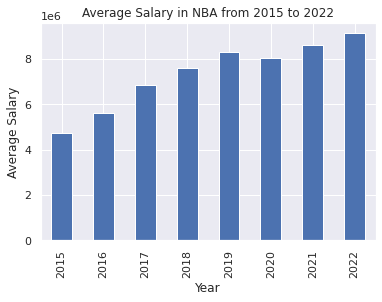

In [36]:
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=df_merged.groupby('Year')['Salary'].mean()
var=sal.plot.bar(x='Year', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 2015 to 2022")
var.plot()

[]

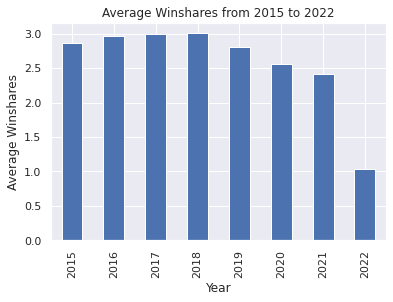

In [37]:
#Plot showing how 3 Point Attempt Rate has changed over time
ws=df_merged.groupby('Year')['WS'].mean()
graph=ws.plot.bar()
graph.set_ylabel('Average Winshares')
graph.set_title('Average Winshares from 2015 to 2022')
graph.plot()

<AxesSubplot:>

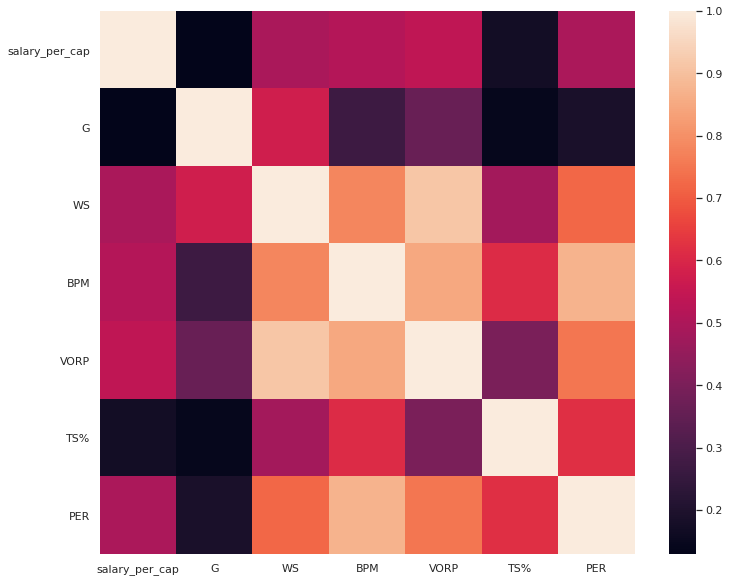

In [38]:
salary=df_merged['Salary']
stats=df_merged.drop('Salary', axis=1)


#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

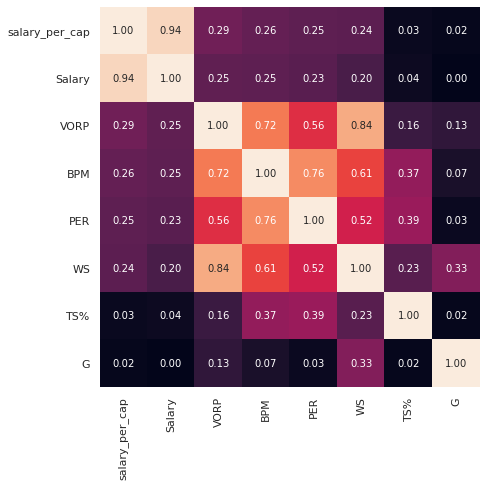

In [40]:
def heatMap(df, k):
    corrmat = df_merged.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'salary_per_cap')['salary_per_cap'].index
    cm = df_merged[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)


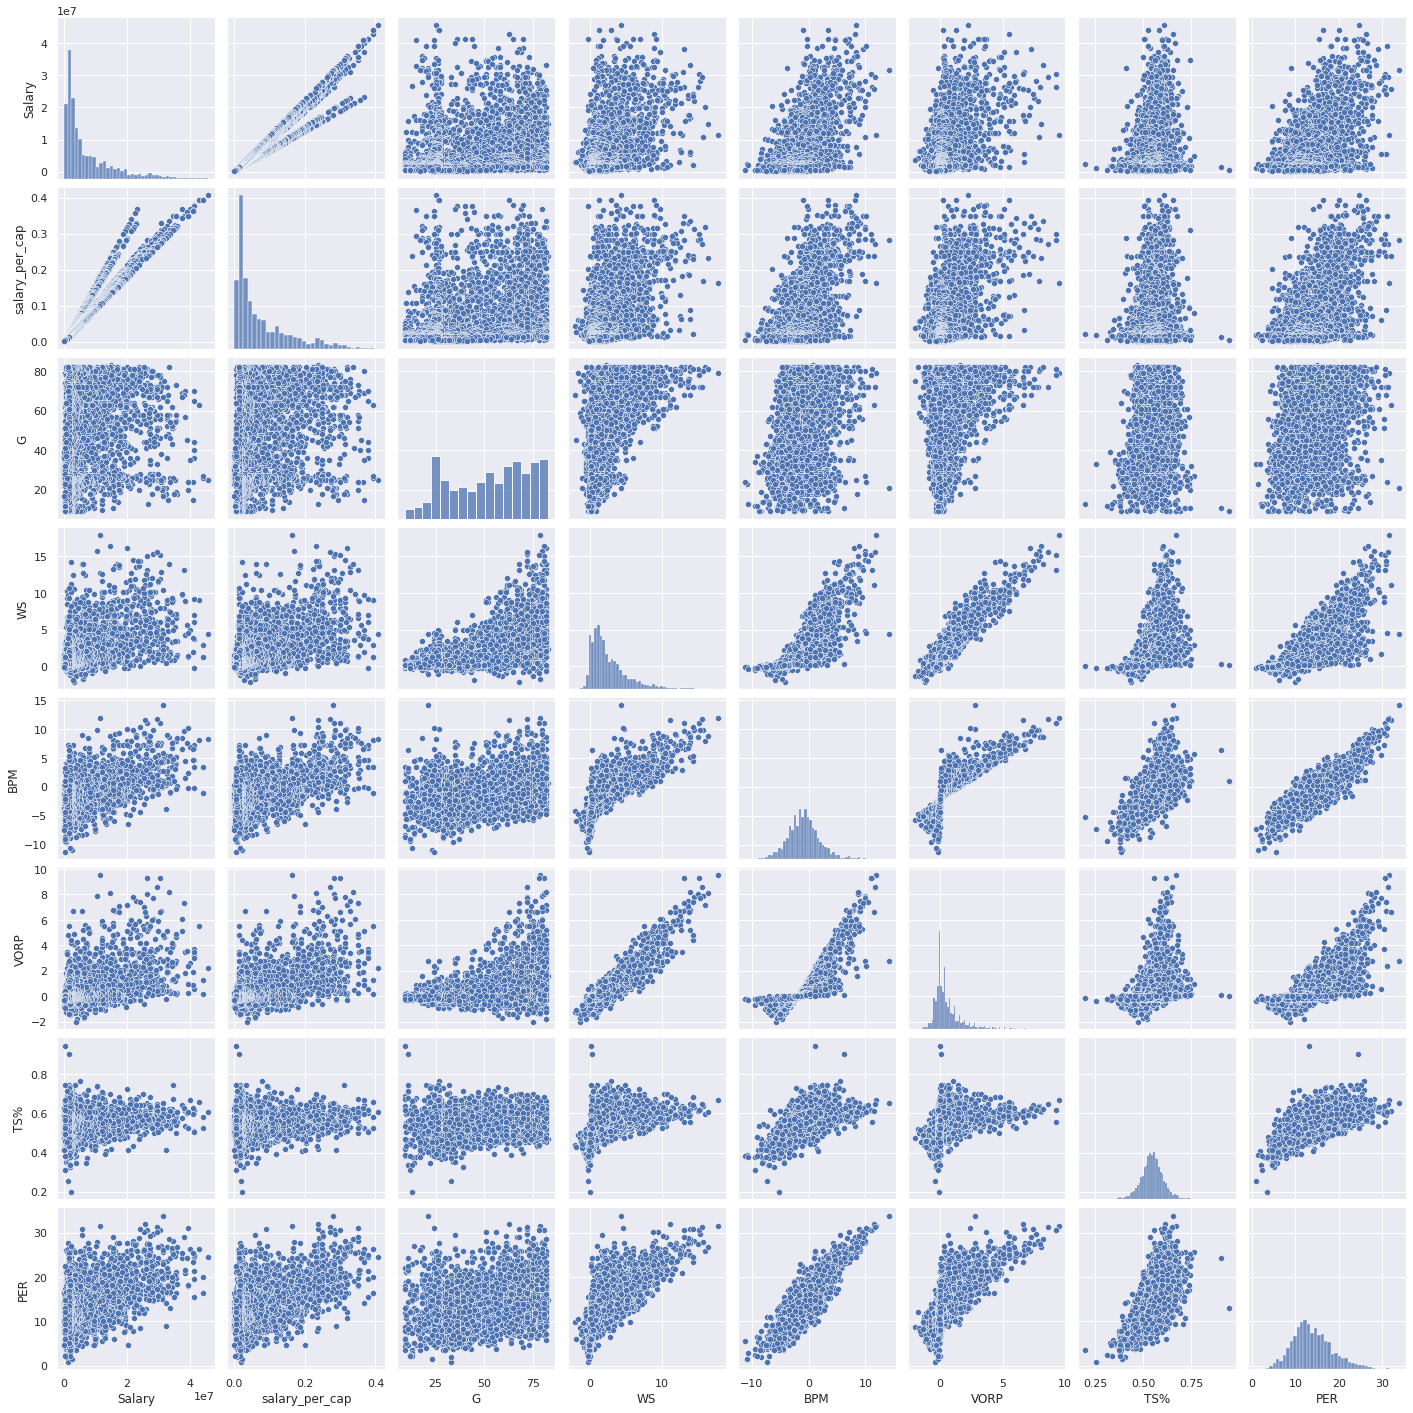

In [39]:
sns.set()
sns.pairplot(df_merged, height=2.5)
plt.show()


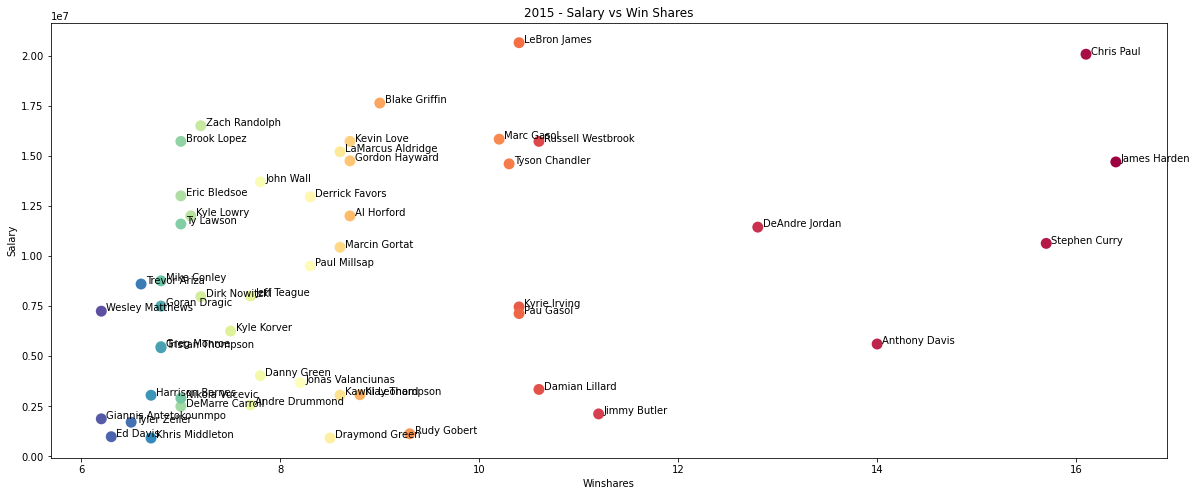

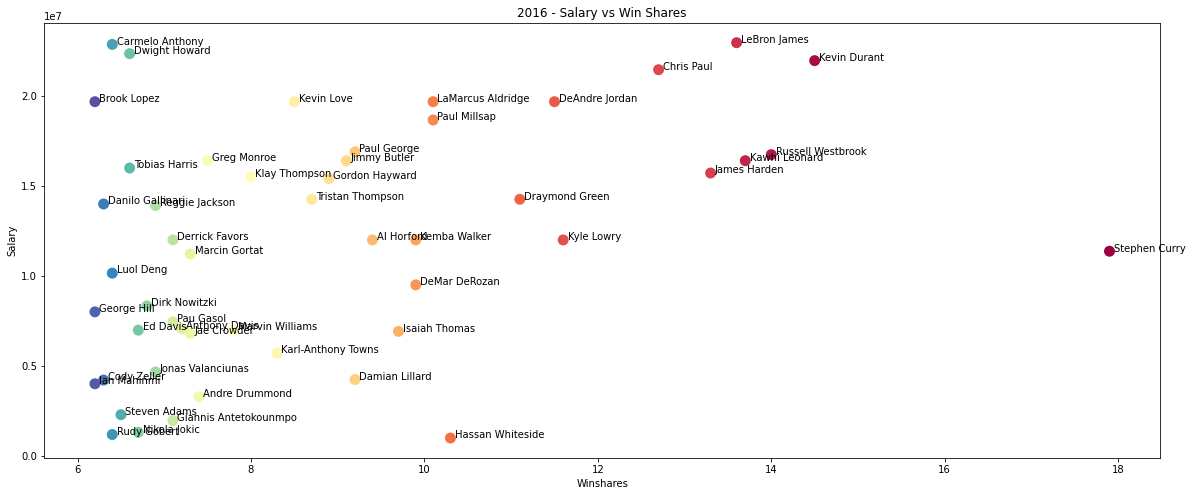

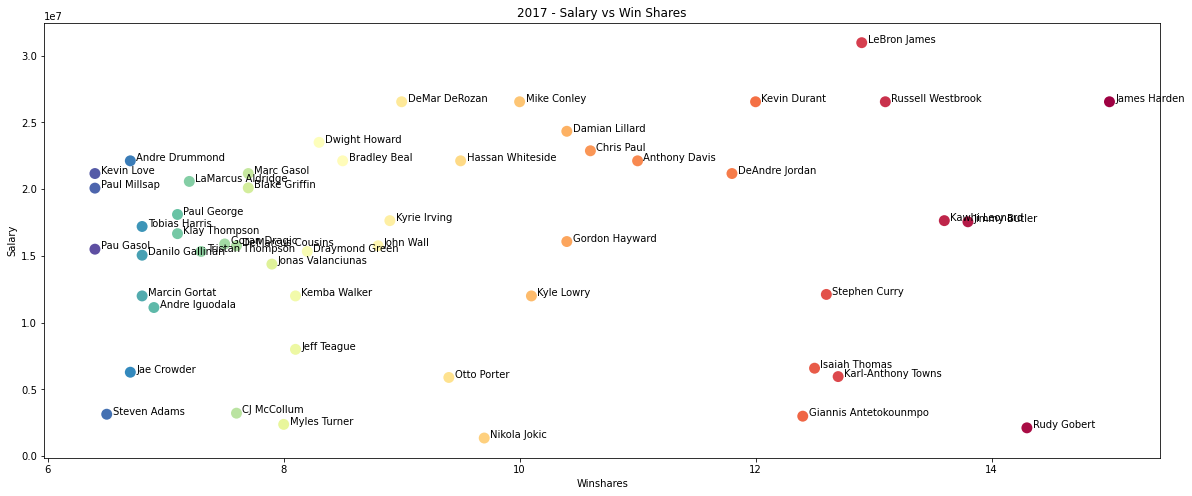

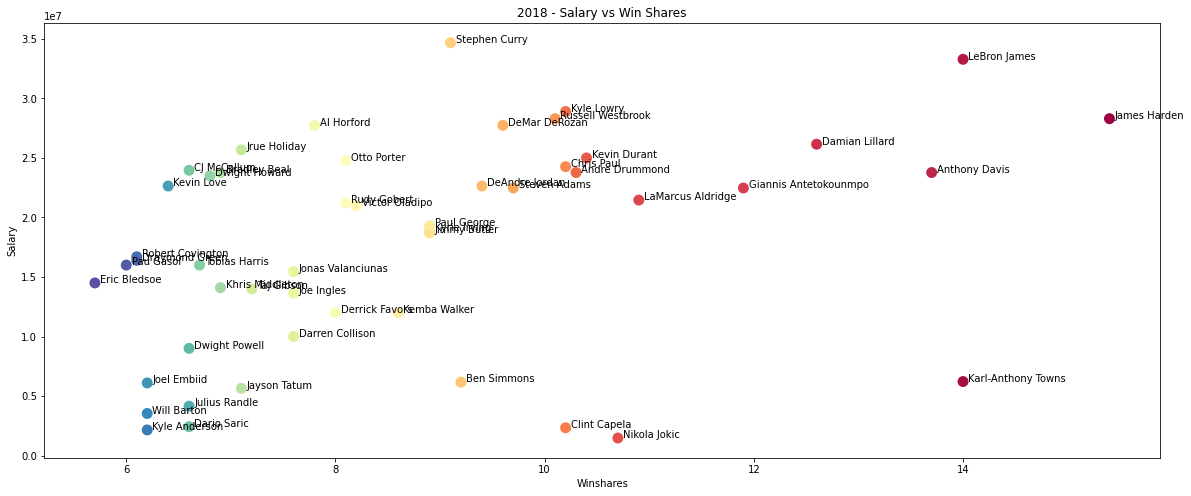

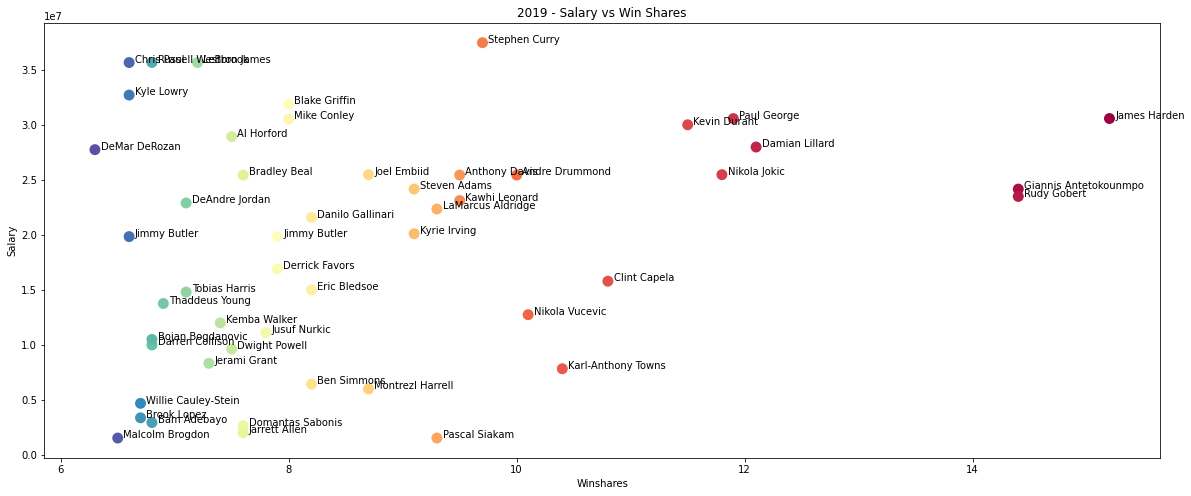

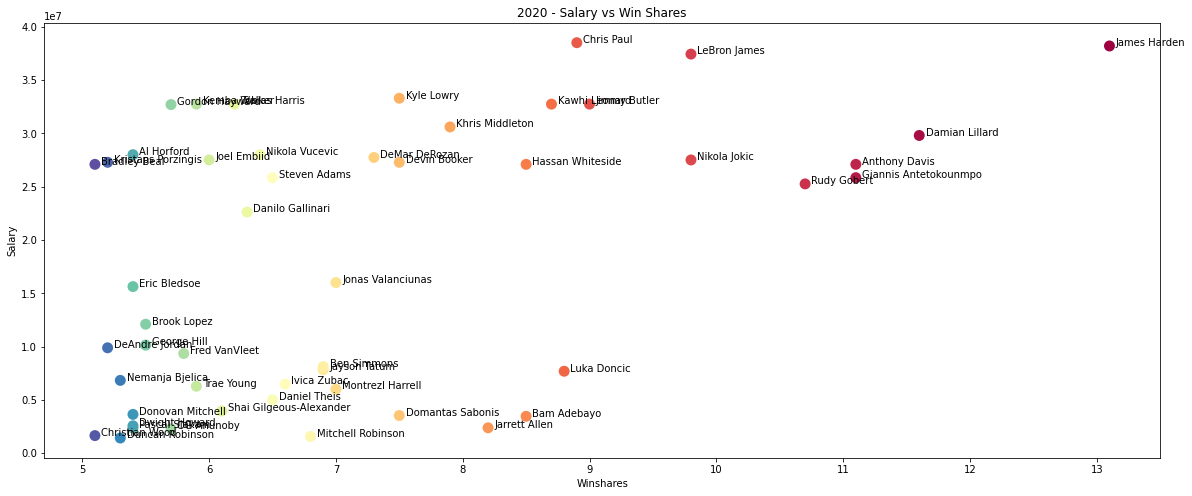

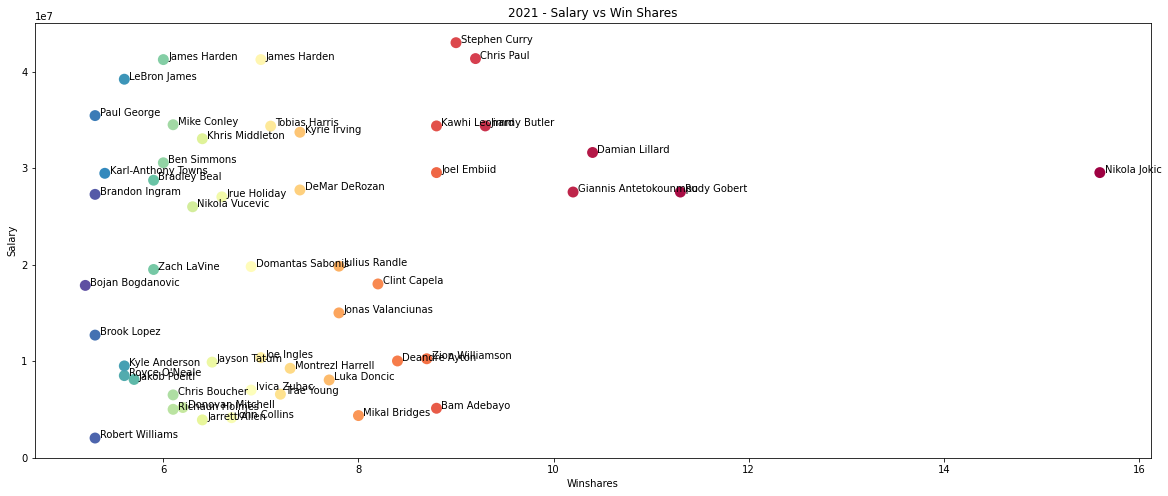

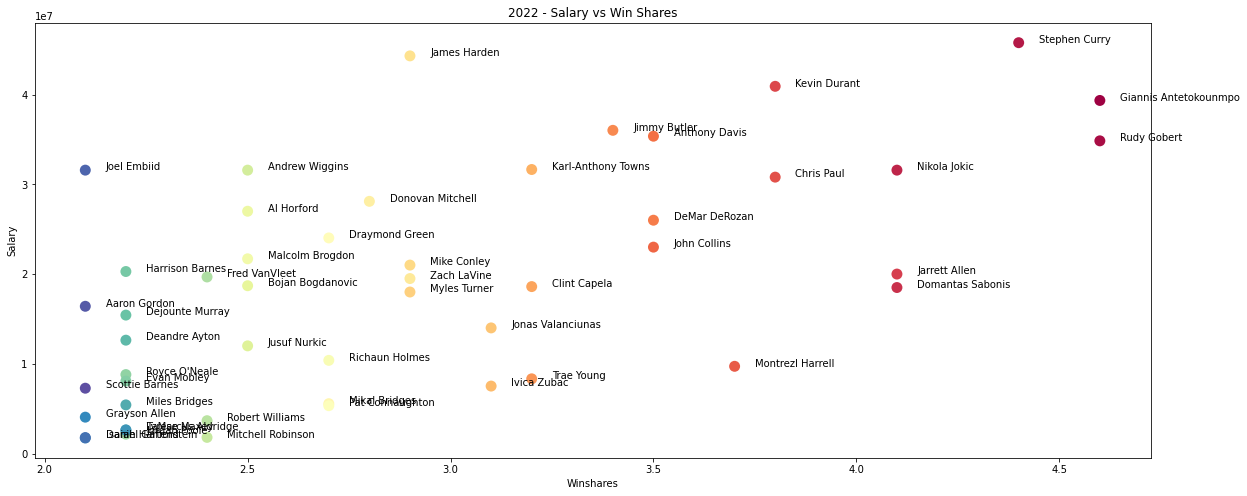

In [11]:

cmap = cm.get_cmap('Spectral')
for df in dfs:
    salary_vs_ws = df.sort_values(by=['WS'],ascending=False).head(50)
    ax = salary_vs_ws.plot('WS', 'Salary',figsize=(20, 8), kind='scatter', s=120, linewidth=0,
                            c=range(len(salary_vs_ws)), colormap=cmap)

    for idx, player in enumerate(salary_vs_ws.iterrows()):
        ax.annotate(player[1].Player, (float(player[1]['WS'])+0.05, float(player[1].Salary)+0.05))
    year = str(df['Year'].values[0])
    plt.title(f'{year} - Salary vs Win Shares')
    plt.xlabel('Winshares')
    plt.ylabel('Salary')
    plt.show()

We can see that there's a relatively good correlation between salary and winshares. The data points on the plot show a trend to the upper right as winshares and salaries increase, with some few exceptions.

### Stat #2: Box Plus Minus

Another usefull stat we'll look at is Box Plus minus or BPM. It's simply a stat that determines how many more points a team scores than there opponent when a certain player is on the court. You can imagine that if a player is playing poorly, then they'll likely have a negative BPM because of their poor contributions on the court (the opposing team is outscoring them). 

Let's see which players lead in BPM and how these results compare to their salary

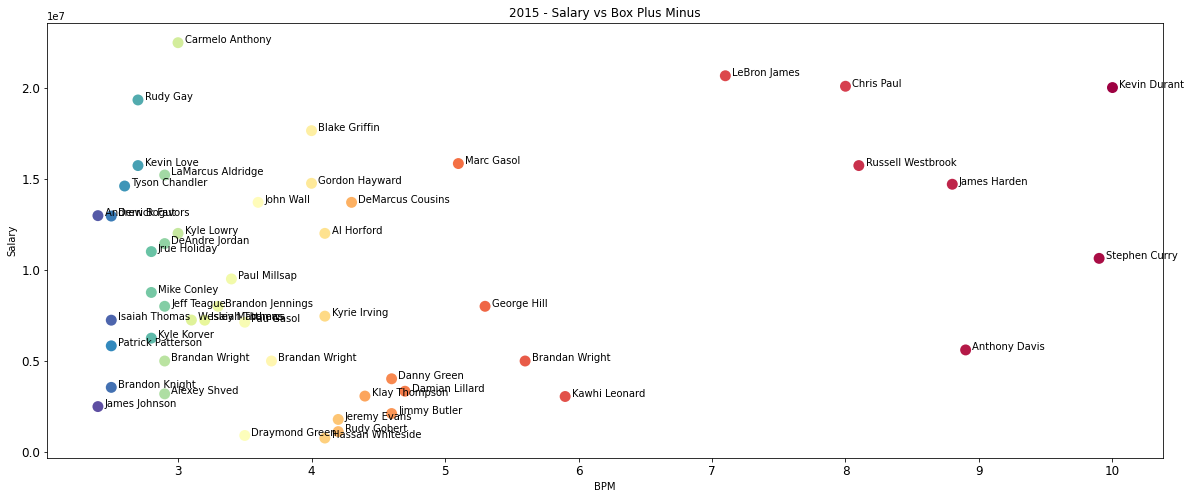

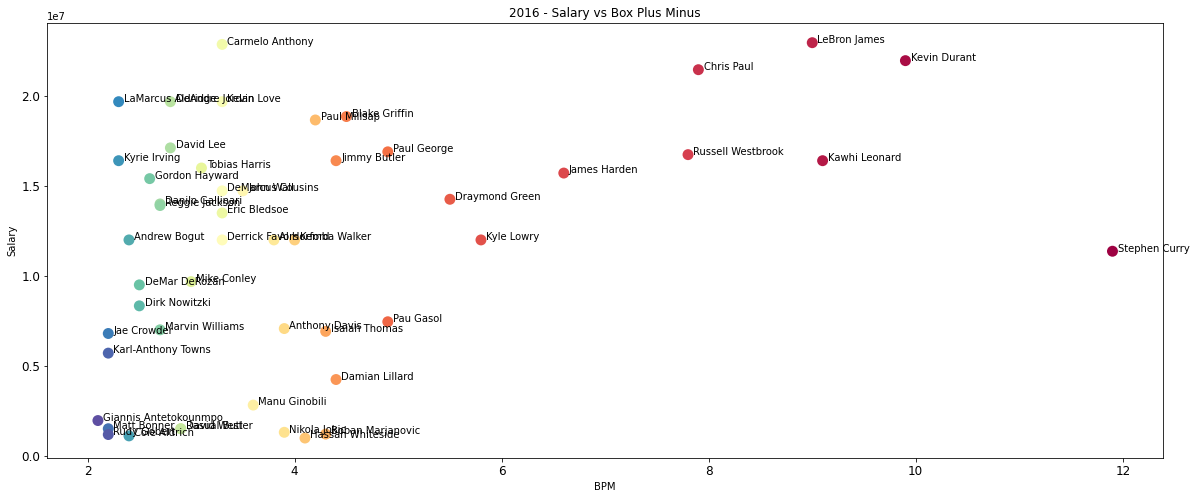

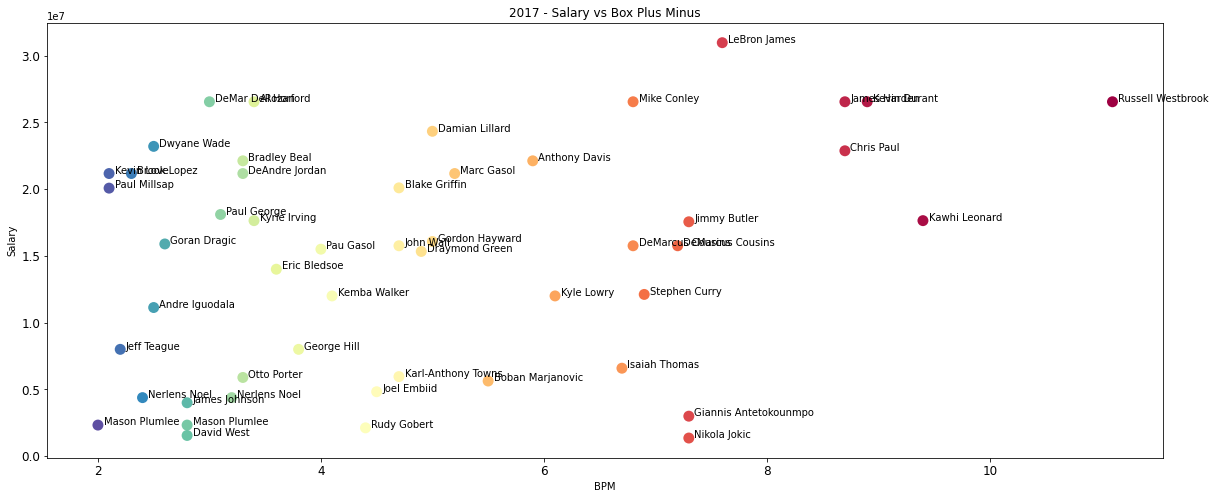

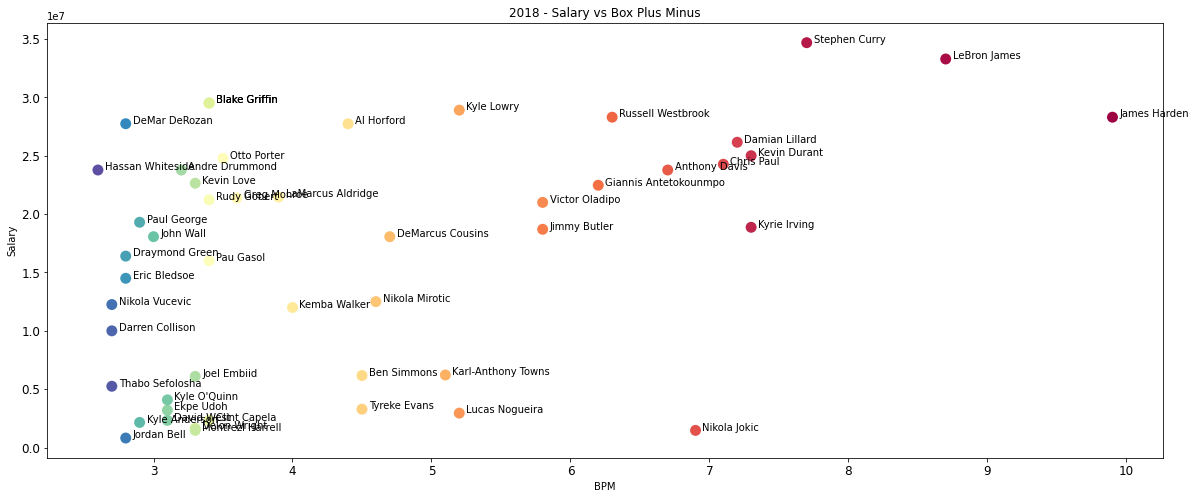

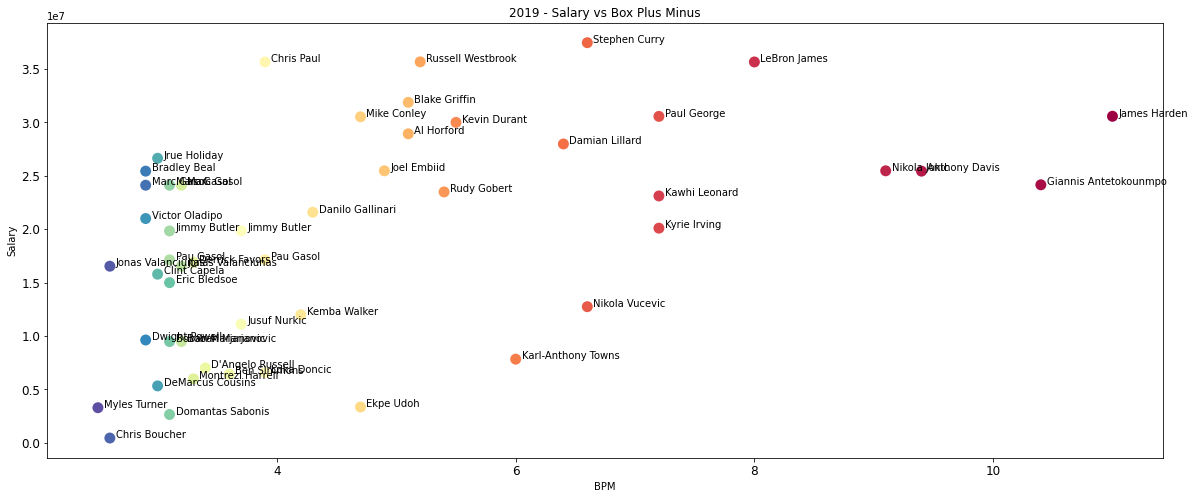

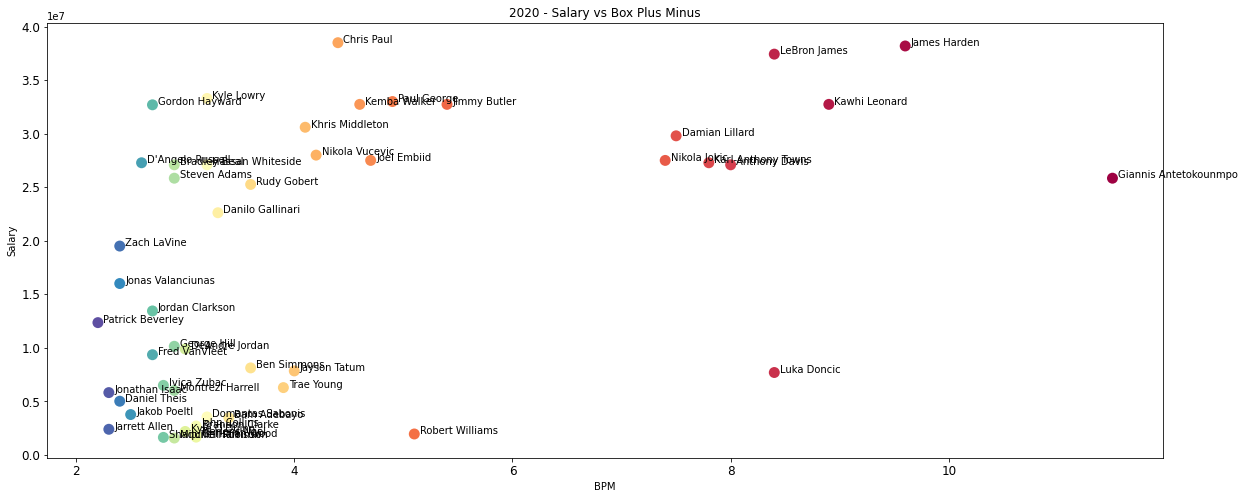

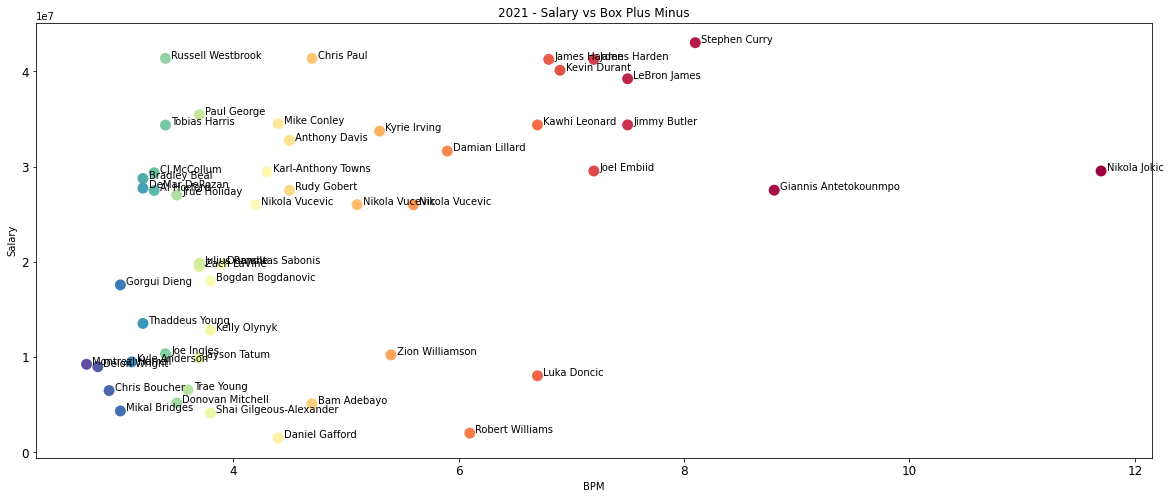

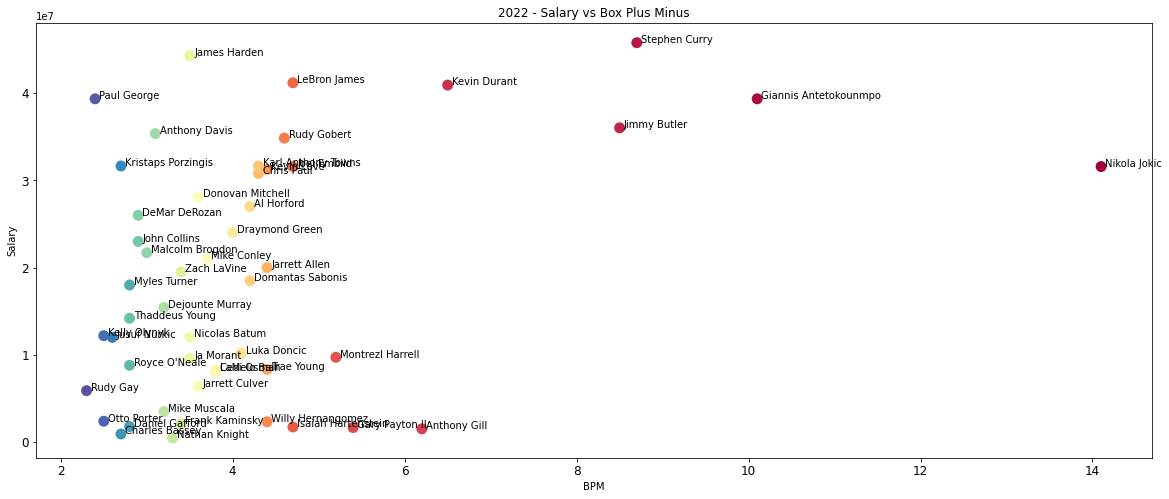

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for df in dfs:
    salary_vs_bpm = df.sort_values(by=['BPM'],ascending=False).head(50)
    ax = salary_vs_bpm.plot('BPM', 'Salary',figsize=(20, 8), kind='scatter', s=120, linewidth=0,
                          fontsize=12,  c=range(len(salary_vs_bpm)), colormap=cmap)

    for idx, player in enumerate(salary_vs_bpm.iterrows()):
        ax.annotate(player[1].Player, (float(player[1]['BPM'])+0.05, player[1].Salary+0.05))

    year = str(df['Year'].values[0])
    plt.title(f'{year} - Salary vs Box Plus Minus')
    plt.xlabel('BPM')
    plt.ylabel('Salary')
    plt.show()

### Stat #3: Value Over Replacement Player

Finally, we'll use the Value over replacement player stat which estimates the points per 100 TEAM possessions that a player contributed above a replacement-level player. Meaning, how much more valuble they are then the player that subsitutes in the game for them. This is a another good way of showing how much more valuable a player is relative to his teammates.  

Let's sort by VORP and see its correlation between salary.

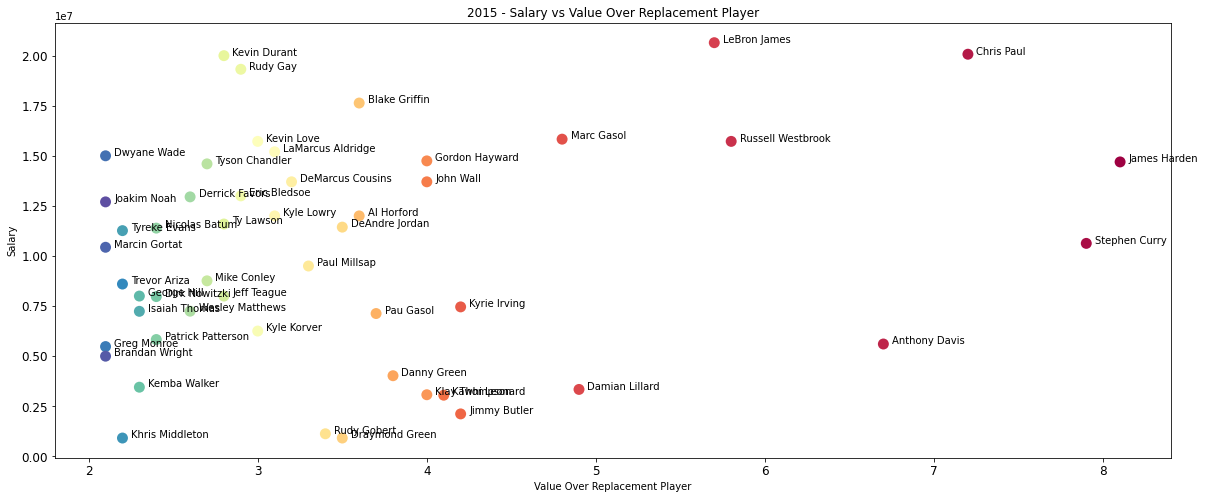

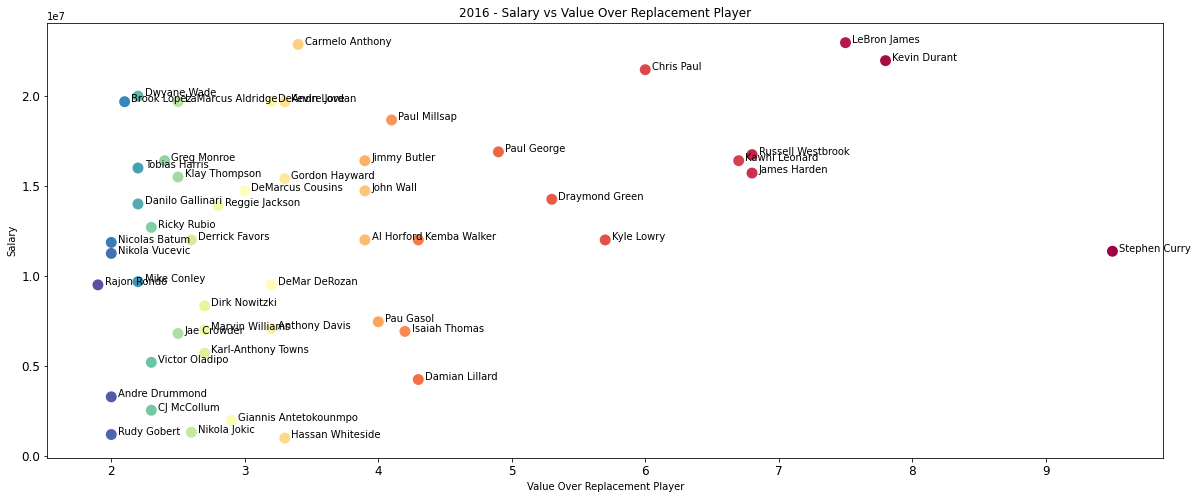

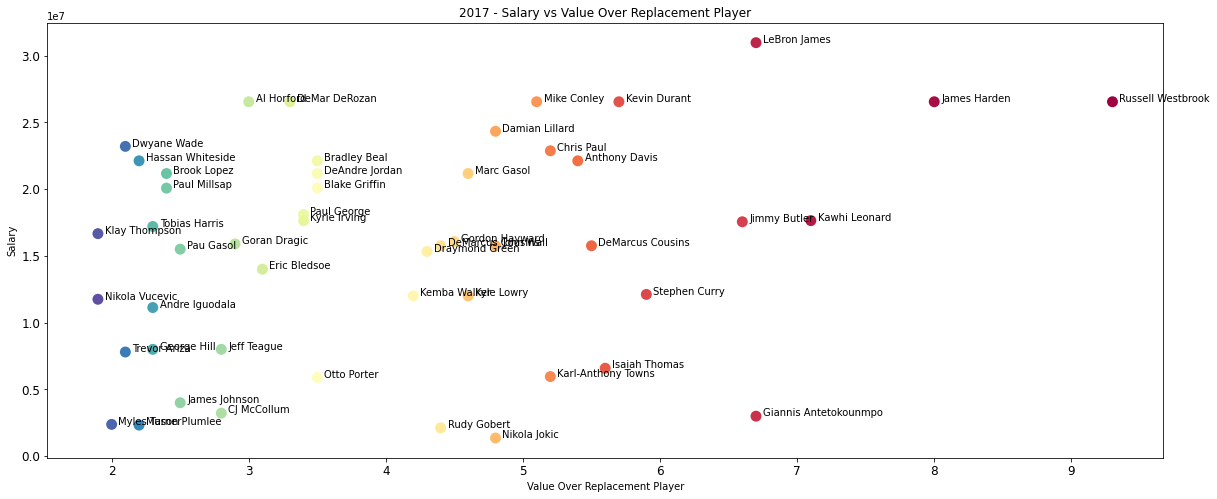

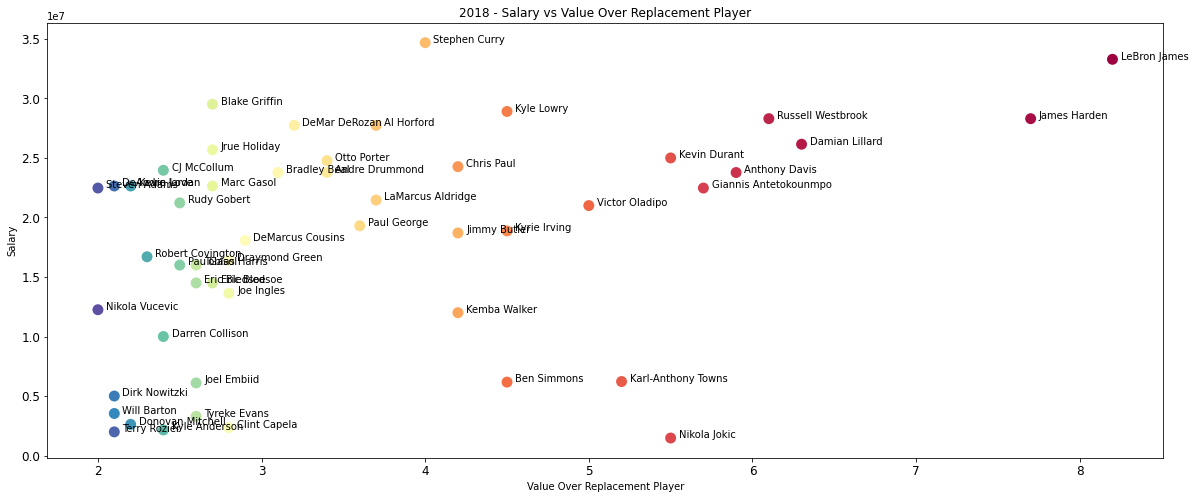

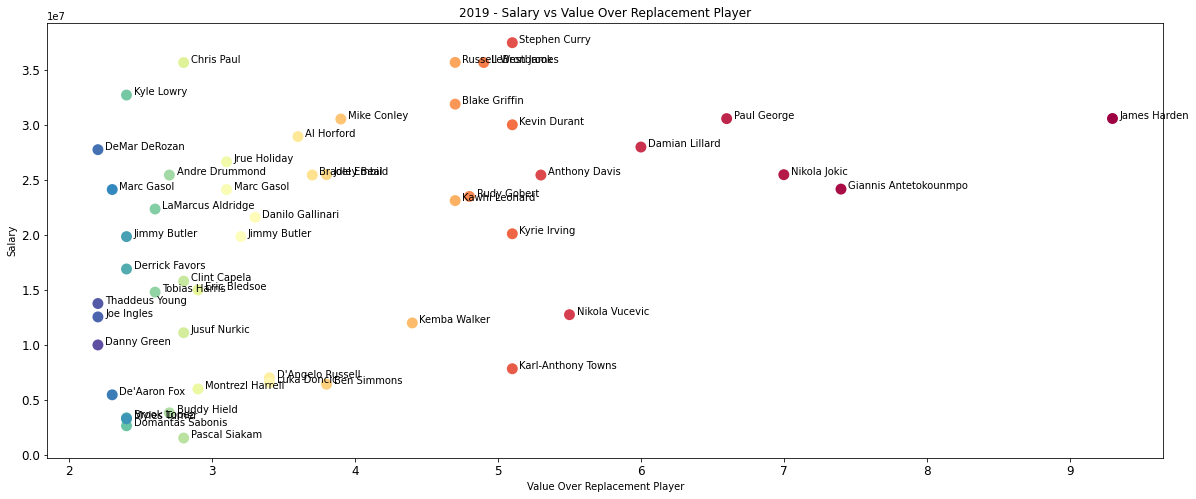

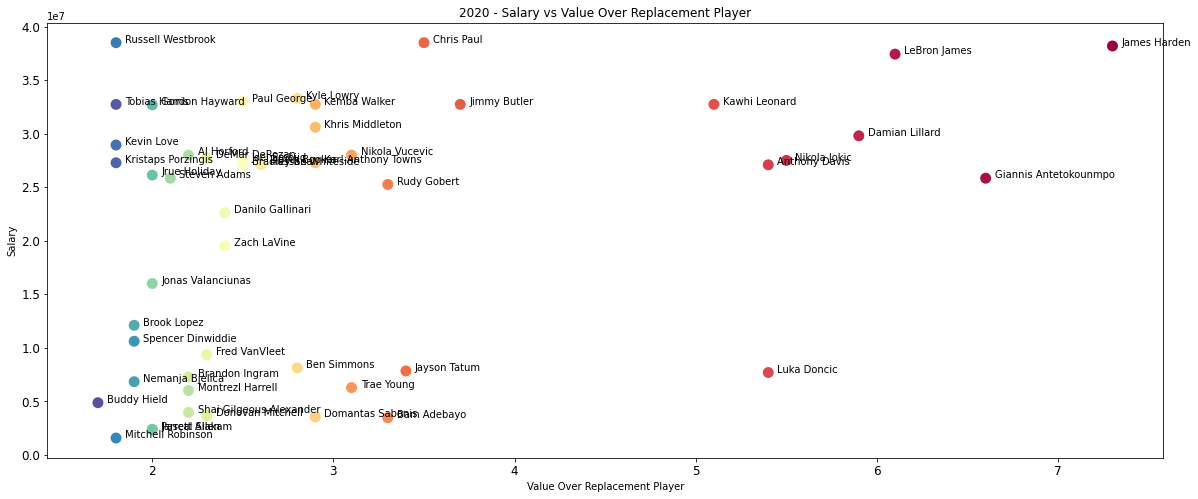

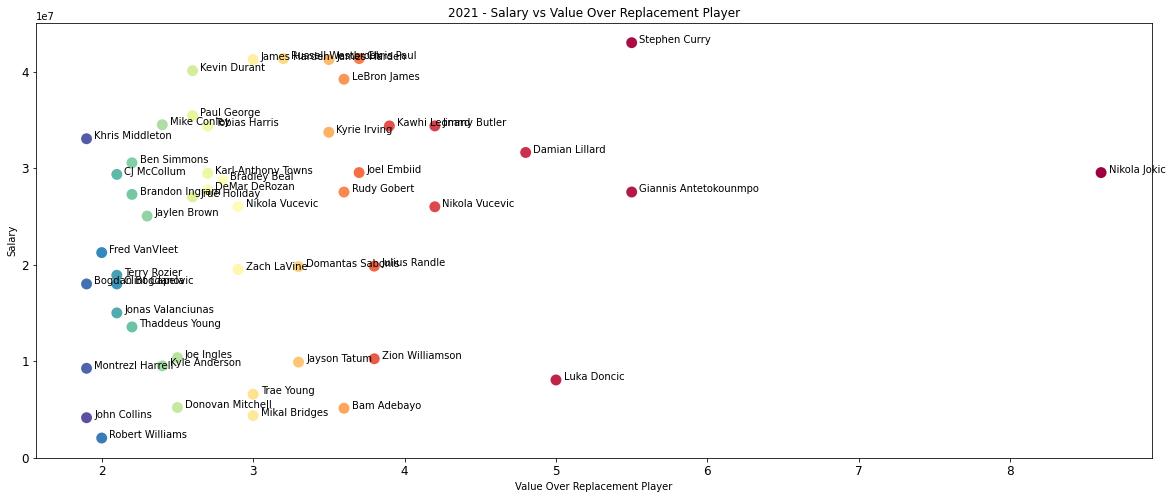

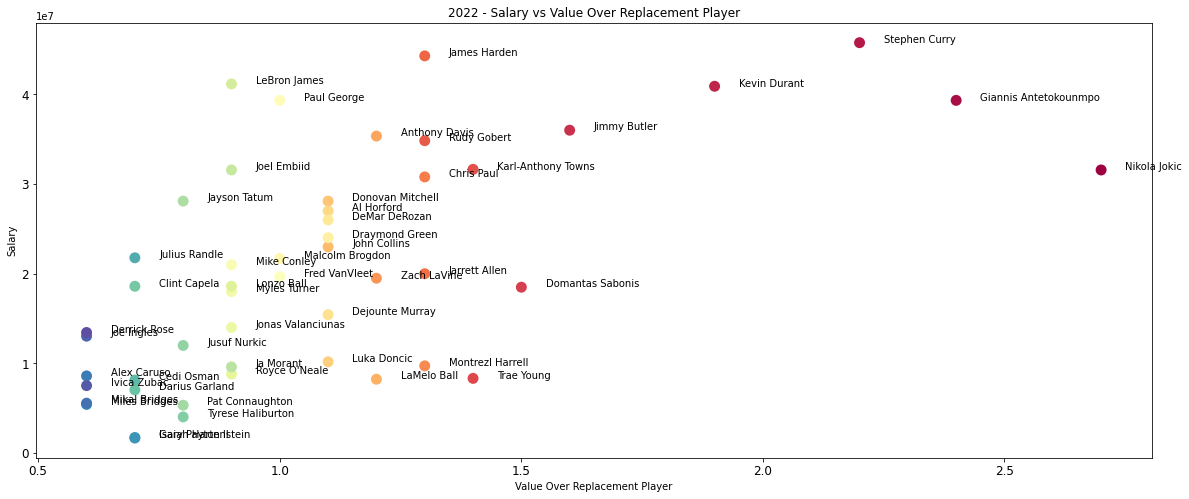

In [13]:
cmap = cm.get_cmap('Spectral')
for df in dfs:
    salary_vs_vorp = df.sort_values(by=['VORP'], ascending=False).head(50)
    ax = salary_vs_vorp.plot('VORP', 'Salary',figsize=(20, 8), kind='scatter', s=120, linewidth=0,
                          fontsize=12,  c=range(len(salary_vs_vorp)), colormap=cmap)

    for idx, player in enumerate(salary_vs_vorp.iterrows()):
        ax.annotate(player[1].Player, (float(player[1]['VORP'])+0.05, player[1].Salary+0.05))
    year = df['Year'].values[0]
    plt.title(f'{year} - Salary vs Value Over Replacement Player')
    plt.xlabel('Value Over Replacement Player')
    plt.ylabel('Salary')
    plt.show()

### Let's make our own

We can see that there a lot of the top players in these categories are the same but in different orders. It makes sense to then to create a stat that takes all of these into account to create a picture of how valuable a player is.

To start, I want to combine the effect a player has when they're on the court and how they impact winning. So, I'm going to take the average of the player's Box Plus Minus and Value Over Replacement Player stats and multiply that by their winshares.

Im choosing to isolate these features because I want to see if a player's value really depends on if their team is winning a lot. If we look back at our previous plots, we see that Nikola Jokic leads in both Box Plus Minus and in Value over Replacement Player but is behind some other top players in winshares. Basically, I want to see how large the impact winning has on the metrics of how valuable a player is.

In [14]:
for idx, df in enumerate(dfs):
    df['True_Value'] = ((df['VORP'] + df['BPM']) / 2.0) * df['WS']
    dfs[idx] = df

Let's see who the top of this stat are.

Again, there's a lot of similaries at the top with the prevous metrics but there is some shift in positions with some players. Let's now look at the highest salaries for this season and compare that with our True Value metric.

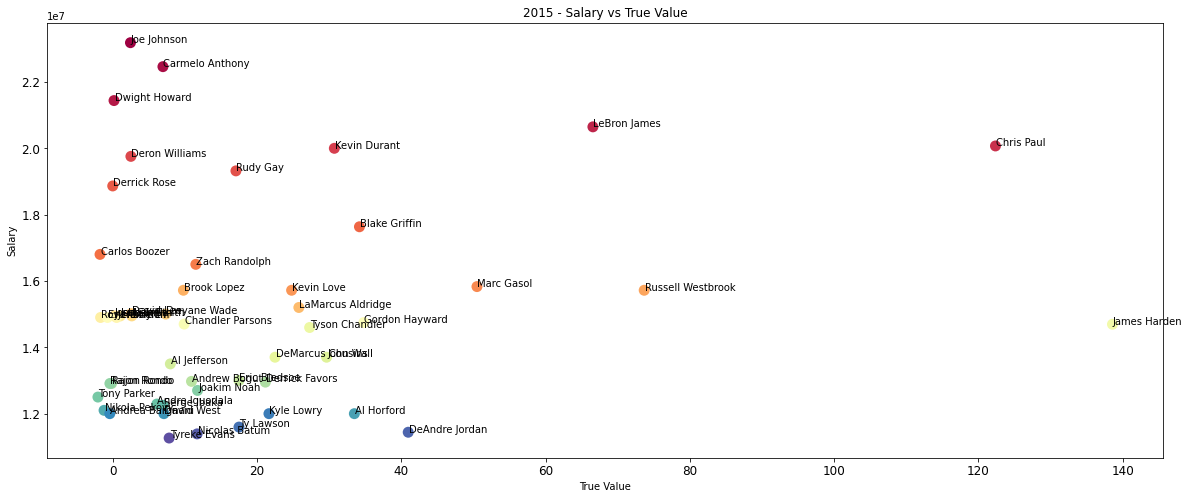

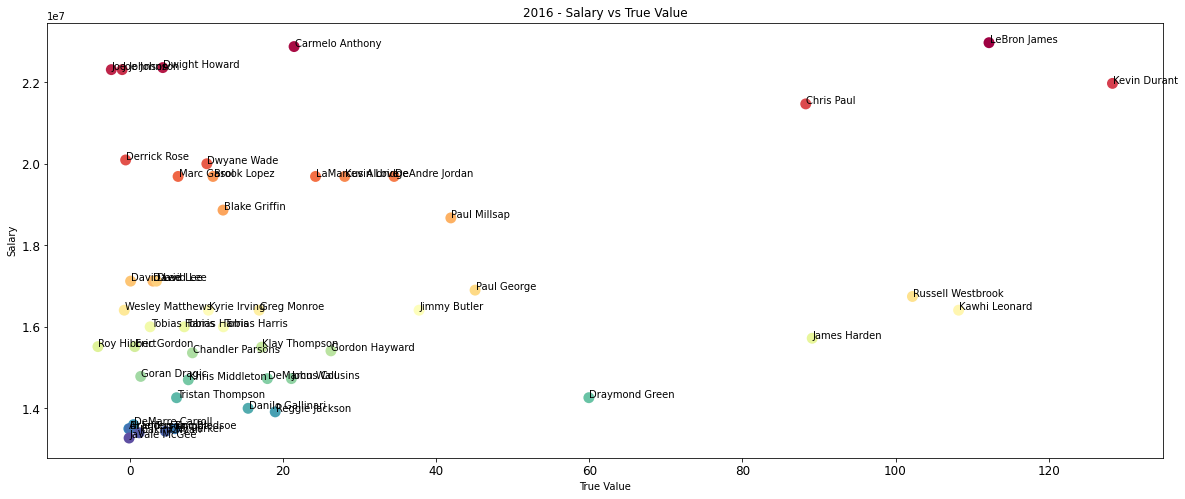

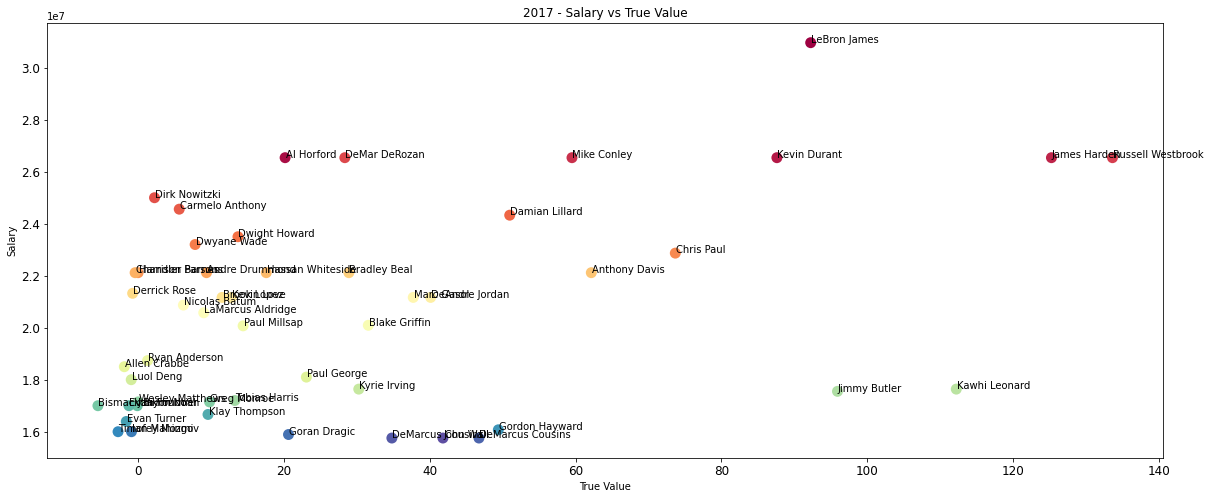

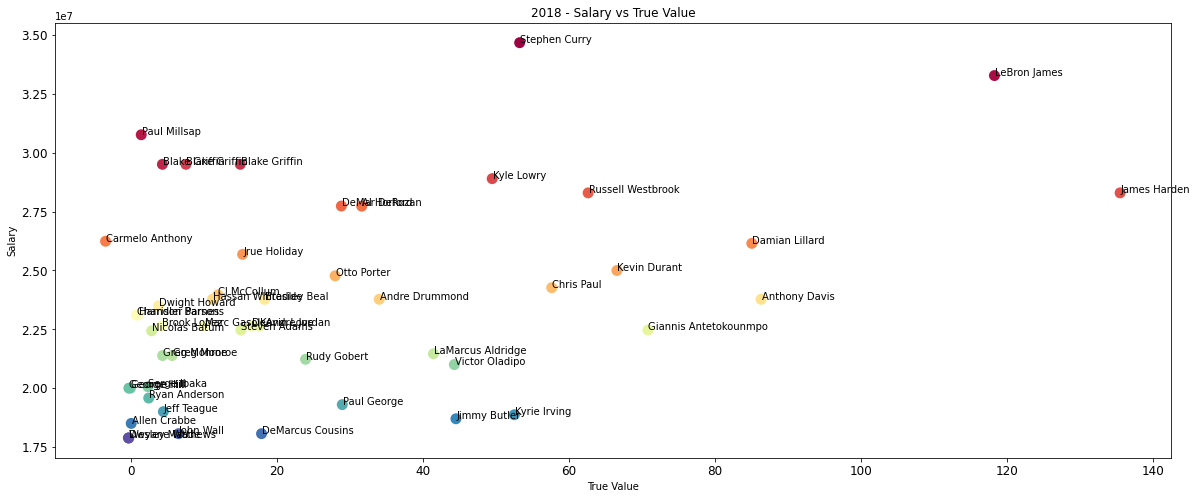

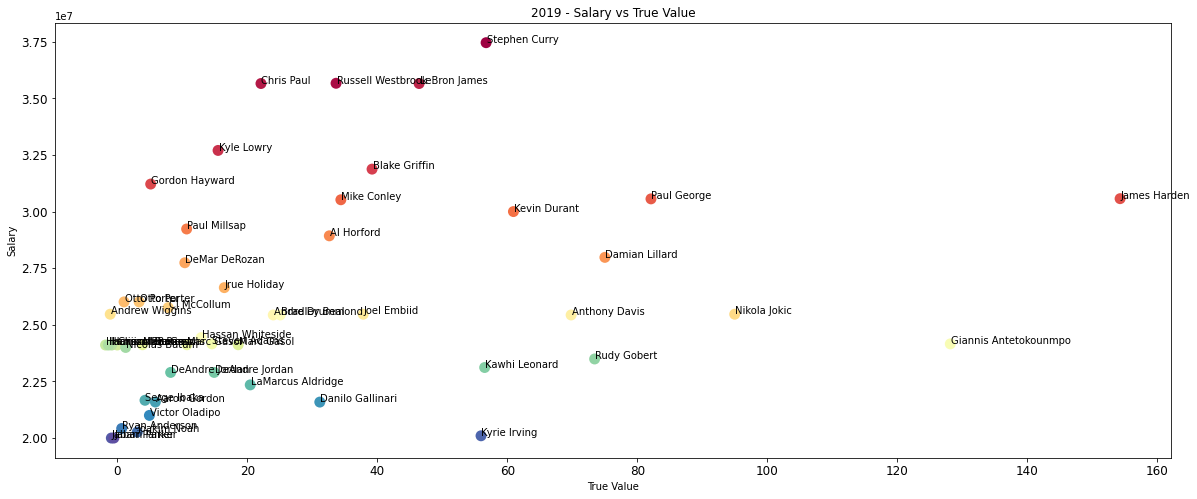

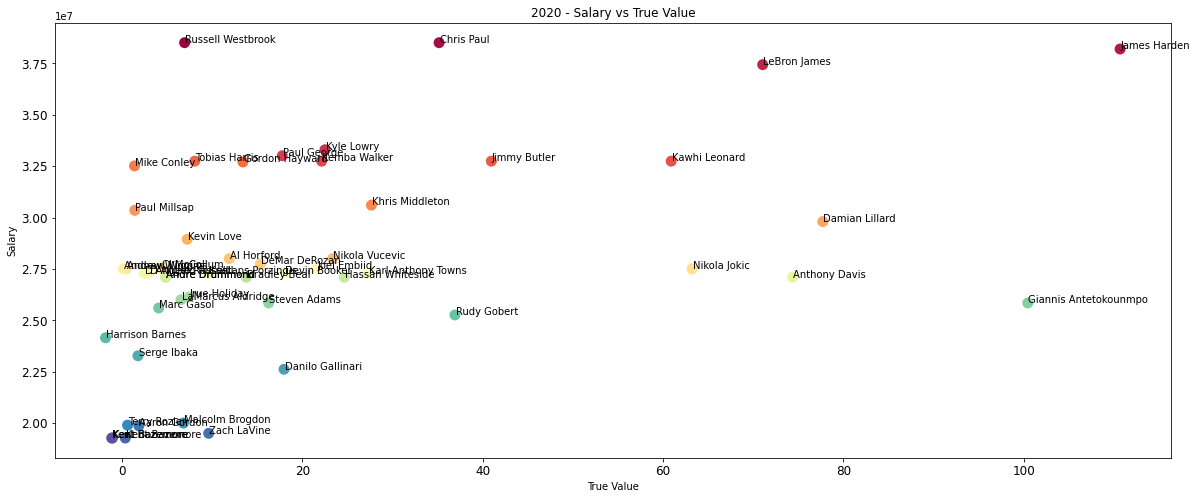

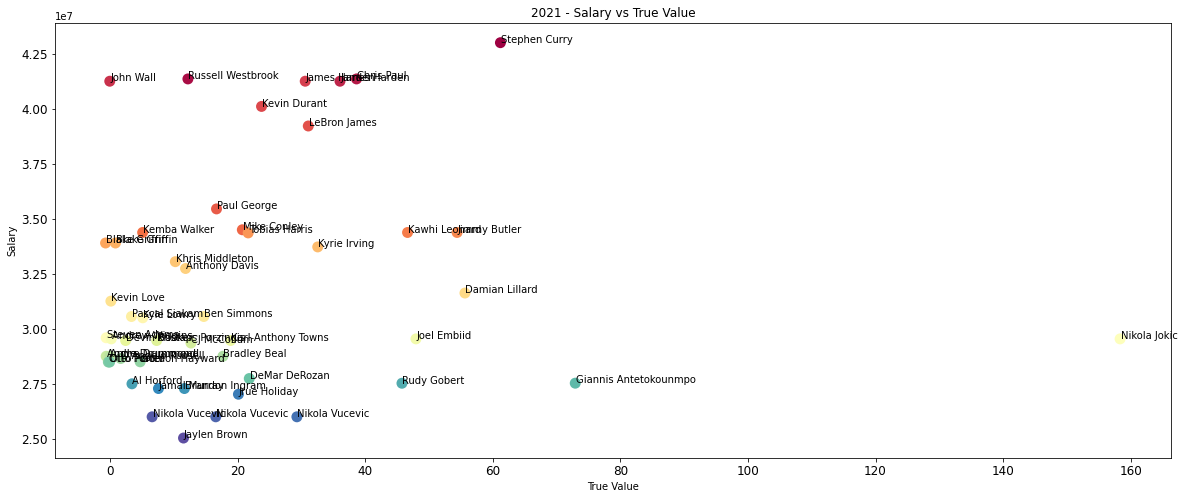

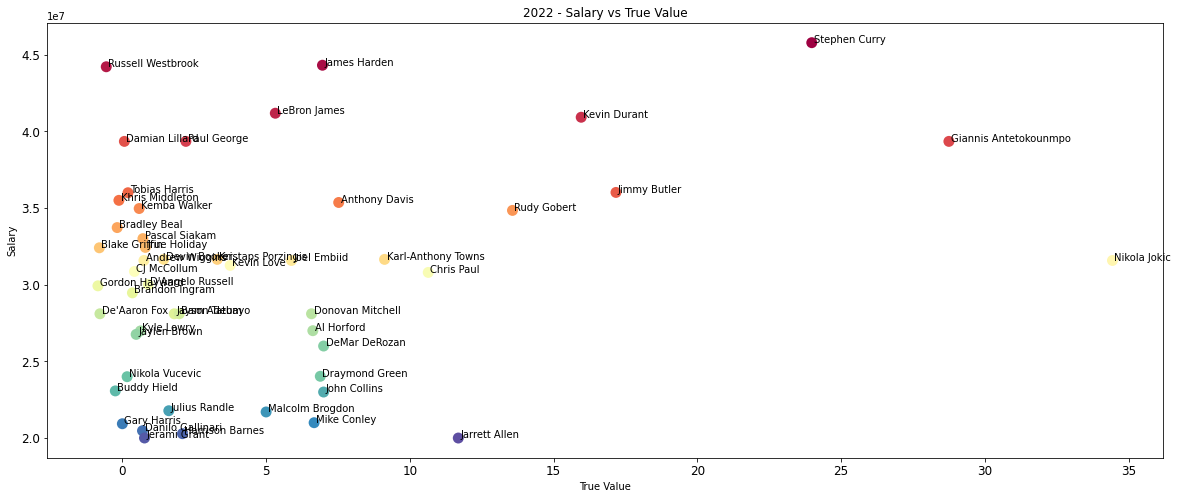

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for df in dfs:
    salary_vs_true_value = df.sort_values(by=['Salary'],ascending=False).head(50)
    ax = salary_vs_true_value.plot('True_Value', 'Salary',figsize=(20,8), kind='scatter', s=120, linewidth=0,
                          fontsize=12,  c=range(len(salary_vs_true_value)), colormap=cmap)

    for idx, player in enumerate(salary_vs_true_value.iterrows()):
        ax.annotate(player[1].Player, (player[1].True_Value+0.07, player[1].Salary+0.07))
    year = df['Year'].values[0]
    plt.title(f'{year} - Salary vs True Value')
    plt.xlabel('True Value')
    plt.ylabel('Salary')
    plt.show()

Looking at this graph, we can see there is some correlation between salary and true value, as a lot of the players with low true values tend to have lower salaries, while most high paid players are higher in this. This makes sense as you would imagine that players that are deemed the most "valuable" would be paid accordingly. However, there are some outliers to this theory.

Russell Westbrook for instance has the second highest salary among active players but his true value is actually **less than 0**. On the other hand, Nikola Jokic's salary pales in comparison to the other players at the top of this metric, yet he leads the league in this stat.

I also considered the possibility that this stat still favored winning too heavily. Looking at the plot, most of the players with lower true values are on teams with relatively mediocre records and most of the higher true values were for players on better teams. However, Nikola Jokic is another outlier here. Currently as I'm writing this, his team is 12-12 and sits at 8th place in the Western Conference which would make them the last seed in the playoffs, yet he has the highest true value in the league.

This fact is inline with the results we found in the other comparisons where he led in both Box Plus Minus and Value over Replacement Player but was behind in Winshares. This could mean that he is **relatively** the most valuable player in the NBA but his teammates aren't playing well enough when he's substituted out, so his team is not winning enough games.

## Let's Start Predicting

In the last section we created visualizations of our data to get a better understanding of how salary relates to a stas like Box Plus Minus, Winshares, and Value over replacement player. We then came up with an effective metric that takes the aforementioned stats together to give us a better way of determining how valuable a player is.

The goal of this section is to create a machine learning model that can accurately predict how much a player's salary should be based on their value with brand new data.

First we need to import sklearn and some of it's libraries to ultimately creat our model

In [48]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.concat(dfs)

In [50]:
categorical = ['Player', 'Year']
le = sklearn.preprocessing.LabelEncoder()
for cat in categorical:
    df[cat] = le.fit_transform(df[cat])

In [51]:
numerical = ['True_Value', 'G', 'BPM', 'VORP', 'WS','Salary', 'salary_per_cap']
rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])

In [52]:
# Seperate and assign features and target columns
y = df['salary_per_cap']
X = df.drop('salary_per_cap', axis=1)
X.shape, y.shape

((3329, 8), (3329,))

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_test.shape

((1997, 8), (1332,))

### Model Building and Training

#### Linear Regression

Linear Regression is the simplest way of implementing regression for our dataset. It find the parameters that minimize the mean squared error between predictions and the true regression targets on the training data.

In [54]:
from sklearn.metrics import mean_squared_error
# instantiate our lr model
lr = LinearRegression()
# fit the model with our training data
lr.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

# computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

# computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nRMSE of training set:', rmse_train_lr)
print('RMSE of the testing set:', rmse_test_lr)

Accuracy on training Data: 0.970
Accuracy on test Data: 0.965

RMSE of training set: 0.14203137375842342
RMSE of the testing set: 0.1581810370228621


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9696066090671347

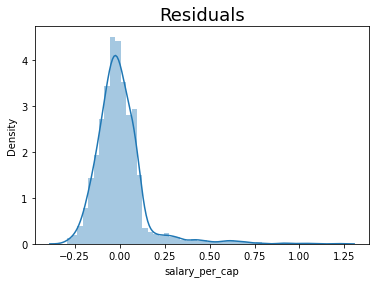

In [55]:
y_hat = lr.predict(X_train)
sns.distplot(y_train - y_hat)
plt.title("Residuals", size=18)
lr.score(X_train,y_train)

#### Decision Trees

In [56]:
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nRMSE of training set is:', rmse_train_tree)
print('RMSE of testing set is:', rmse_test_tree)

Accuracy on training Data: 1.000
Accuracy on test Data: 0.997

RMSE of training set is: 0.01165278308010851
RMSE of testing set is: 0.04568893798450978
